<a href="https://colab.research.google.com/github/imnadiarasheed/ML/blob/main/Ass1_LogReg_GD(reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
###
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

###
warnings.filterwarnings("ignore");

###
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
df_train=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/train.csv")
df_test=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/test2.csv")
#df_gt=pd.read_csv("drive/MyDrive/Colab Notebooks/ML/Assignment-1/Dataset/gender_submission.csv")
#print(df_train.head(5)), print(df_test.head(5))

In [16]:
df_train.drop("PassengerId",axis=1,inplace=True), df_test.drop("PassengerId",axis=1,inplace=True)
df_train.drop("Name",axis=1,inplace=True), df_test.drop("Name",axis=1,inplace=True)
df_train.drop("Ticket",axis=1,inplace=True), df_test.drop("Ticket",axis=1,inplace=True)
df_train.drop("Cabin",axis=1,inplace=True), df_test.drop("Cabin",axis=1,inplace=True)
print(df_train), print(df_test)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3 

(None, None)

**Preprocessing**

**Data Cleaning**

In [17]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


(None, None)

In [18]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
#df_train['Embarked'].fillna(df_train['Embarked'].mode(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [19]:
print(df_train.isnull().sum()), print(df_test.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


(None, None)

**Label Encoding**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])
print(df_train), print(df_test)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]
     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.50000      0      0   

(None, None)

**Training and Testing using Logistic Regression GD**

**Data Normalization & Feature Selection**

In [21]:
data_train=df_train.copy()
data_test=df_test.copy()

training_data = data_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
testing_data = data_test[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

#print(X_train), print(y_train), print(X_test), print(y_test)
#test_data

In [22]:
Class_column="Survived"

In [23]:
###
def filtered_training_data(training_data_part,class_label):
    
    #Take Class Column out from Training Data and Store it to Another variable.
    #Converting class_Column into array
    #Dropping class Column from Training Data
    
    return(np.array(training_data_part[class_label]),training_data_part.drop(labels=class_label,axis=1))

#Call to Function
class_of_training_data,filtered_training_data=filtered_training_data(training_data,Class_column)


###
def normalize(data_to_noramlize):
    
    #Converting Training Data from type Dataframe to Array for Matrix Operation
    pure_training_data=np.array(data_to_noramlize)
    
    #Dividing Each Column of Training Data with respective Column Maximium Value to Normalize the Dataset
    return(pure_training_data/np.max(pure_training_data,axis=0))

#Call to Function
normalized_Data=normalize(filtered_training_data)

In [24]:
def initial_parameter(normalized_Data_part):
    
    #Generating Initila HyperParameter Values
    return(np.random.randn(1,1),np.random.randn(normalized_Data_part.shape[1],1))


def sigmoid(normalized_Data_part,theta0_initial_val,theta_initial_val):
    
    #Multiplying Training Data with theta_initial and adding theta0_initial in all terms after mat. mul. operation.
    power=theta0_initial_val+np.dot(normalized_Data_part,theta_initial_val)
    
    #Calculating eq (iii) for all training dataset
    return(1/(1+ np.exp(-power)))


def deri_wrt_theta0(temp,normalized_Data_part):
    
    #Derivative of Cost Function w.r.t to theta0 to Upgrade theta0 during Minimization
    return((np.sum(temp))/normalized_Data_part.shape[0])


def deri_wrt_theta(temp,normalized_Data_part,lam,theta_initial):
    
    
    ##Derivative of Cost Function w.r.t to thetas(except theta0) to Upgrade thetas during Minimization - L2 Regularization 
    #term on upgrading thetas
    return(((np.matmul((normalized_Data_part.T),temp))/normalized_Data_part.shape[0]) -
           ((lam/normalized_Data_part.shape[0])*theta_initial))


def cost_function(class_of_training_data,H_theta0_theta_A,theta_A,normalized_Data_part,lam):
    a=np.matmul((class_of_training_data.T),np.log(H_theta0_theta_A))
    b=np.matmul(((1-class_of_training_data).T),np.log(1-H_theta0_theta_A))
    c=(a+b)/normalized_Data_part.shape[0]
    d=(lam*np.sum(np.square(theta_A)))/2*normalized_Data_part.shape[0]
    return(-c+d)
    
##just For Removing Ambiguity ,size is change from (n,) to (n,1)
##No difference in overall shape and Data 
class_of_training_data=np.reshape(class_of_training_data,(training_data.shape[0],1))

In [25]:
def gradient_descent(alpha,epsilon,normalized_Data,class_of_training_data,lam):
    #parameter's
    #Alpha(Learning Rate)
    #Epsilon : to stop gradient descent at proper minimized state
    #lam(lambda) : For L2 Regularisation
    
    
    #Call to Function
    theta0_initial,theta_initial=initial_parameter(normalized_Data)
    
    i=0
    iterations=[]
    neg_log_like_loss = []
    
    while(True):
        
        #Call to Function
        #Equation iv at theta0_initial ,theta_initial
        H_theta0_theta_i=sigmoid(normalized_Data,theta0_initial,theta_initial)
        
    
        #Calculating Difference between calculated H_theta0_theta_i and given class_of_training_data
        Tem =H_theta0_theta_i-class_of_training_data
        
        #Call to Functions
        Derivative_theta0 =deri_wrt_theta0(Tem,normalized_Data)
        Derivative_thetas =deri_wrt_theta(Tem,normalized_Data,lam,theta_initial)
        
        
        
        #Equation No v at theta0_initial ,theta_initial with L2 Regularization
        neg_log_like_initial= cost_function(class_of_training_data,H_theta0_theta_i,theta_initial,normalized_Data,lam)
        
        
        #Updating the hyperparameters value
        theta0_final = theta0_initial - alpha*Derivative_theta0
        theta_final = theta_initial - alpha*Derivative_thetas
        
    
        ##Equation iv at theta0_final,theta_final
        H_theta0_theta_f = sigmoid(normalized_Data,theta0_final,theta_final)
    
        #Equation No v at theta0_final,theta_final with L2 Regularization
        neg_log_like_final= cost_function(class_of_training_data,H_theta0_theta_f,theta_final,normalized_Data,lam)
        
        if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
            return(theta0_final,theta_final,iterations,neg_log_like_loss)
            break
            
        theta0_initial = theta0_final
        theta_initial = theta_final
    
        i += 1
    
        iterations.append(i)
        neg_log_like_loss.append(neg_log_like_initial)

In [13]:
#call to gradient_Descent Function
theta0_final,theta_final,iterations,neg_log_like_loss=gradient_descent(0.01,0.0000005
                                                                       ,normalized_Data,class_of_training_data,0.0000001)

Text(0.5, 1.0, 'Minimization Curve of Cost Function in Logistic Regression')

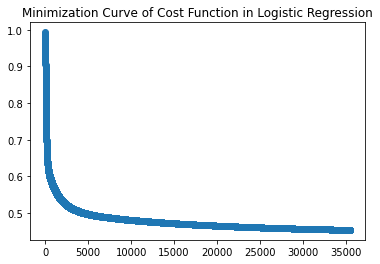

In [26]:
import matplotlib.pyplot as plt
plt.scatter(iterations,neg_log_like_loss,data="Logistic Regression")
plt.title('Minimization Curve of Cost Function in Logistic Regression')

In [27]:
#pre-processing of testing data

def testing(testing_data,Class_column):
    
    #Take Class Column out from Testing Data and Store it to Another variable.
    #Converting class_Column into List(for Easy Implementation )
    #Dropping class Column from Testing Data
    #Normalizing the testing data
    
    class_of_testing_data=list(testing_data[Class_column])
    filtered_testing_data=testing_data.drop(labels=Class_column,axis=1)
    normalized_testing_Data=normalize(filtered_testing_data)
    
    return(class_of_testing_data,normalized_testing_Data)

#Call to Function
class_of_testing_data,normalized_testing_Data=testing(testing_data,Class_column)

In [28]:
#Prediction of class (Training Data)
def accuracy(normalized_training_Data,theta0_final,theta_final):
    output_list=[]
    
    #calculating sigmoid function value for each data row in testing data
    sigmoid_function_value=sigmoid(normalized_training_Data,theta0_final,theta_final)
     
    for i in sigmoid_function_value:
        if i>=0.50:
            output_list.append(1)
        else:
            output_list.append(0)
    print("Accuracy Of Model on Training Data : ",accuracy_score(class_of_training_data,output_list))
    print("Confusion Matrix :\n\n",confusion_matrix(class_of_training_data,output_list))
   
    print("\nCompleter Classification Report on Training Data :\n\n",classification_report(class_of_training_data,output_list))
    return (output_list)
    
    

    
#Call to Accuracy function to check Model Accuracy and others    
output_predicted=accuracy(normalized_Data,theta0_final,theta_final)

Accuracy Of Model on Training Data :  0.7890011223344556
Confusion Matrix :

 [[467  82]
 [106 236]]

Completer Classification Report on Training Data :

               precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.69      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [29]:
#Prediction of class (Testing Data)
def accuracy(normalized_testing_Data,theta0_final,theta_final):
    output_list=[]
    
    #calculating sigmoid function value for each data row in testing data
    sigmoid_function_value=sigmoid(normalized_testing_Data,theta0_final,theta_final)
     
    for i in sigmoid_function_value:
        if i>=0.50:
            output_list.append(1)
        else:
            output_list.append(0)
    print("Accuracy Of Model on Testing Data : ",accuracy_score(class_of_testing_data,output_list))
    print("Confusion Matrix :\n\n",confusion_matrix(class_of_testing_data,output_list))
   
    print("\nCompleter Classification Report on Testing Data :\n\n",classification_report(class_of_testing_data,output_list))
    return (output_list)
    
    

    
#Call to Accuracy function to check Model Accuracy and others    
output_predicted=accuracy(normalized_testing_Data,theta0_final,theta_final)

Accuracy Of Model on Testing Data :  0.9665071770334929
Confusion Matrix :

 [[259   7]
 [  7 145]]

Completer Classification Report on Testing Data :

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.95      0.95      0.95       152

    accuracy                           0.97       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.97      0.97      0.97       418



In [32]:
#parameters
print(theta0_final), print(theta_final)

[[3.20309735]]
[[-2.21538042]
 [-2.45757496]
 [-0.85209086]
 [-1.40031132]
 [ 0.53513197]
 [ 1.70504581]
 [-0.53008191]]


(None, None)